In [5]:
using Jacobi
using PyPlot

In [6]:
#resolve A*X = B
function solver_beta(A,B,nb)
  Abb = A[1:nb,1:nb]
  Abi = A[1:nb,(nb+1):end]
  Aii = A[(nb+1):end,(nb+1):end]
  Aib = A[(nb+1):end,1:nb]
  #########################
  #                       #
  #  |Abb Abi| |xb| = |Bb|#
  #  |Aib Aii| |xi|   |Bi|#
  #########################

  Bi = B[(nb+1):end]
  Bb = B[1:nb]

  Xb = inv(Abb - Abi*inv(Aii)*Aib)* (Bb - Abi*inv(Aii)*Bi)
  Xi = inv(Aii)*Bi - inv(Aii)*transpose(Abi)*Xb

  X = [Xb;Xi]
end


solver_beta (generic function with 1 method)

In [7]:
using LaTeXStrings

#intervalo
x = linspace(-1,1,101)
function ϕ0(x)
    if(x<=1.0 && x >= -1.0)
        ϕ0 = (1-x)/2
    else
        ϕ0 = 0
    end
    return ϕ0
end
function ϕ1(x)
    if(x<=1.0 && x >= -1.0)
        ϕ1 = (1+x)/2
    else
        ϕ1 = 0
    end
    return ϕ1
end

function ψj(p,E)
    if(p == 1)
     return  (1-E)/2
    end 
    if(p == 2)
     return  (1+E)/2
    end
     return  (1-E)*(1+E)/4 * jacobi(E, p-3, 1, 1)
end    

ψj (generic function with 1 method)

In [8]:
fun(x) = sin(x*pi)

fun (generic function with 1 method)

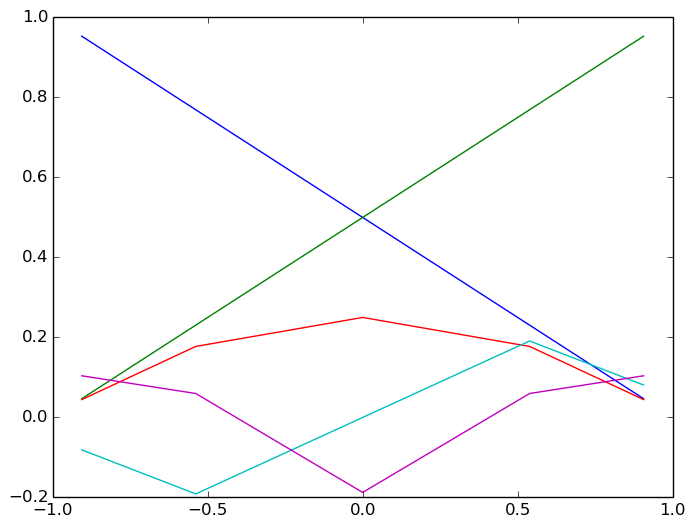

In [9]:
Q = 5
I = 2*Q - 1
ϕ = zeros(I,Q)
ξ = zgj(Q)
w = wgj(ξ,0.,0.)
for i in 1:I
    for j in 1:Q
        ϕ[i,j] = ψj(i,ξ[j])
    end
end
for i in 1:Q
    plot(ξ,ϕ[i,:]')
end

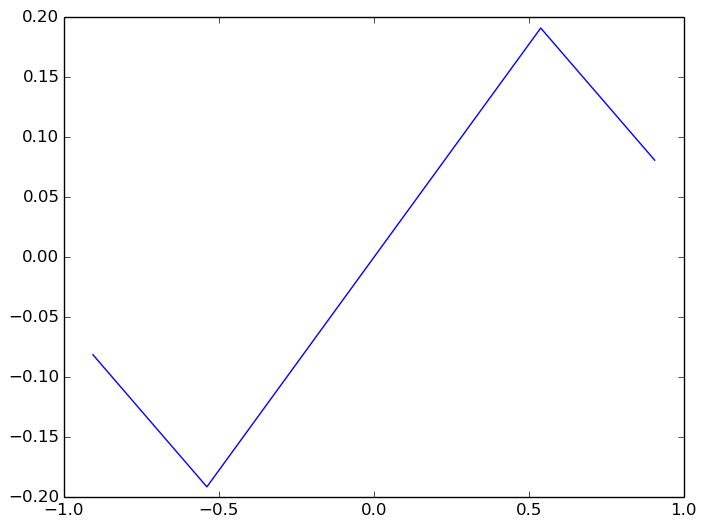

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fda172fb8d0>

In [17]:
plot(ξ,ϕ[4,:]')

In [68]:
M = zeros(I,I)
for i in 1:I
    for j in 1:I
       m= 0.0
        for q in 1:Q
            m = m + ϕ[q,i]*ϕ[q,j]*w[q]
        end
        M[i,j] = m
    end
end
M

LoadError: LoadError: BoundsError: attempt to access 9x5 Array{Float64,2}:
  0.95309     0.769235    0.5        0.230765   0.0469101
  0.0469101   0.230765    0.5        0.769235   0.95309  
  0.0447095   0.177513    0.25       0.177513   0.0447095
 -0.0810297  -0.19117     0.0        0.19117    0.0810297
  0.104144    0.0598767  -0.1875     0.0598767  0.104144 
 -0.11134     0.0927516  -0.0       -0.0927516  0.11134  
  0.10239    -0.143542    0.15625   -0.143542   0.10239  
 -0.0795288   0.0662511   0.0       -0.0662511  0.0795288
  0.0470366   0.0579669  -0.136719   0.0579669  0.0470366
  at index [1,6]
while loading In[68], in expression starting on line 2

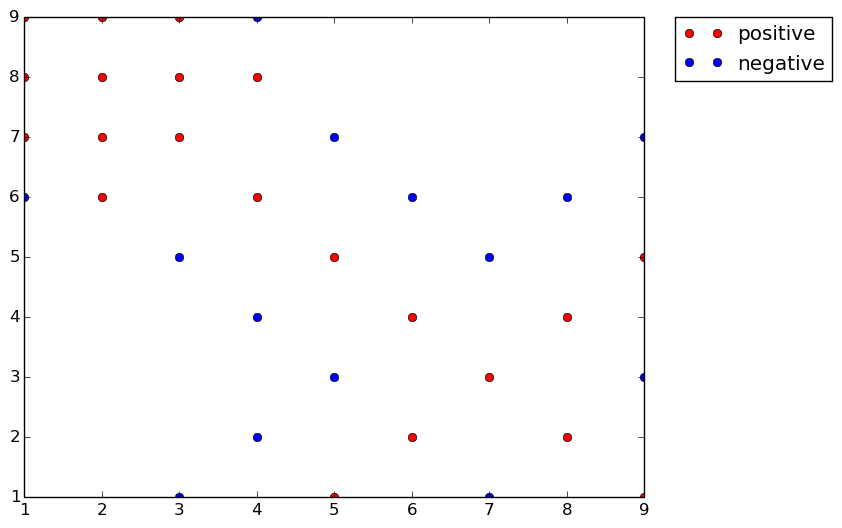

In [58]:
include("biblioteca.jl")
plot_matrix(M)

In [59]:
fr = zeros(I)
for i in 1:I
    temp = 0.0
    for q in 1:Q
        temp = temp + fun(ξ[q])*ϕ[q,i]*w[q]
    end
    fr[i]= temp
end

LoadError: LoadError: BoundsError: attempt to access 9x5 Array{Float64,2}:
  0.95309     0.769235    0.5        0.230765   0.0469101
  0.0469101   0.230765    0.5        0.769235   0.95309  
  0.0447095   0.177513    0.25       0.177513   0.0447095
 -0.0810297  -0.19117     0.0        0.19117    0.0810297
  0.104144    0.0598767  -0.1875     0.0598767  0.104144 
 -0.11134     0.0927516  -0.0       -0.0927516  0.11134  
  0.10239    -0.143542    0.15625   -0.143542   0.10239  
 -0.0795288   0.0662511   0.0       -0.0662511  0.0795288
  0.0470366   0.0579669  -0.136719   0.0579669  0.0470366
  at index [1,6]
while loading In[59], in expression starting on line 2

In [60]:
uh = solver_beta(M,fr,0)

uq = ϕ*uh

ue = [fun(i) for i in ξ] 
erro = uq - ue


LoadError: LoadError: DimensionMismatch("second dimension of A, 5, does not match length of x, 9")
while loading In[60], in expression starting on line 3

In [61]:
plot(ξ,uq,"-s",label= "aprox")
plot(ξ,ue,label="exata")
legend()

LoadError: LoadError: UndefVarError: uq not defined
while loading In[61], in expression starting on line 1